# Analyze 3' RACE

240405
  
1. Snakemake to get inserts
2. Table for supplementary information
3. Aligned views using heatmaps





In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar

In [119]:
import glob
import os
import seaborn as sns

In [120]:
# 3' RACE
sDataFolder = '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data'
sResultFolder = '/home/kwonschul/projects/u1promoter/results/240405_novaseq78_analysis'
sPrefix = '3RACE' # This is also the sample type. It should be either 3RACE or 5RACE.
sSuffix = '.count.top20v5.xlsx'
sInfoFile = '/home/kwonschul/projects/u1promoter/results/240405_novaseq78_analysis/240405_novaseq78_adaptor_v5.txt'

In [121]:
dfInfo = pd.read_table(sInfoFile, skiprows=3, encoding= 'unicode_escape')
dfInfo = dfInfo[dfInfo['Type'] == sPrefix] # Select 3' RACE or 5' RACE samples
dfInfo['Template'] = dfInfo.apply(lambda row: row['Plasmid_sequence'].upper().split(row['Adaptor5_seq'].upper())[1], axis=1) # for 3' RACE
dfInfo['StandardPos'] = dfInfo.apply(lambda row: row['Template'].find(row['Standard_terminal_sequence'].upper()), axis=1)
dfInfo

,Type,Promoter,Experiment,Replicate,Standard_terminal_sequence,Sample_ID,Plasmid_name,Adaptor5_name,Adaptor5_seq,Adaptor3_name,Adaptor3_seq,Adaptor3_offset,Paired_end_fastq,Plasmid_sequence,Template,StandardPos
0,3RACE,U1,Exp1,Duplicate,ACTTTCTGGA,3RACE-A01-pKW151,phU1-Rx-EGFP12,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAG...,CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTC...,6
1,3RACE,U1,Exp1,Duplicate,ACTTTCTGGA,3RACE-A02-pEZ105,phU1-Rx-EGFP12_50nt,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAG...,CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTC...,6
2,3RACE,U1,Exp2,.,ACTTTCTGGA,3RACE-B01-pEZ17,phU1-Rx-15-SL4-EGFP12,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGCCAAACAAATTTACTTGGGGGAC...,CGACCGCCAAACAAATTTACTTGGGGGACTGCGTTCGCGCTTTCCC...,49
3,3RACE,U1,Exp2,Duplicate,ACTTTCTGGA,3RACE-B02-pKW151,phU1-Rx-EGFP12,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAG...,CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTC...,6
4,3RACE,U1,Exp2,Duplicate,ACTTTCTGGA,3RACE-B03-pEZ105,phU1-Rx-EGFP12_50nt,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAG...,CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTC...,6
5,3RACE,U1,Exp2,.,ACTTTCTGGA,3RACE-B04-pEZ106,phU1-Rx-KRAS1_23nt,oKW703.3race.KRAS1F,GGACCATAGGTACATCTT,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),GGACCATAGGTACATCTTCAGAGACTTTCTGGAGTTTCAAAAACAG...,CAGAGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCA...,5
6,3RACE,U1,Exp2,.,ACTTTCTGGA,3RACE-B05-pEZ107,phU1-Rx-KRAS2_23nt,oKW704.3race.KRAS2F,GTGAATATCTTCAAATGAT,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),GTGAATATCTTCAAATGATTTAGACTTTCTGGAGTTTCAAAAACAG...,TTAGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCAT...,4
7,3RACE,U1,Exp2,.,ACTTTCTGGA,3RACE-B06-pEZ113,phU1-Psp13b-EGFP12_30nt,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGGTTGTGGAAGGTCCAGTTTTGAG...,CGACCGGTTGTGGAAGGTCCAGTTTTGAGGGGCTATTACAACACTT...,42
8,3RACE,U1,Exp2,.,ACTTTCTGGA,3RACE-B07-pEZ114,phU1-Psp13b-EGFP12_50nt,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGGTTGTGGAAGGTCCAGTTTTGAG...,CGACCGGTTGTGGAAGGTCCAGTTTTGAGGGGCTATTACAACACTT...,42
9,3RACE,U1,Exp2,.,ACTTTCTGGA,3RACE-B08-pEZ108,phU1-13bt1-EGFP12_30nt,oKW702.3race.EGFP12F,CTTGCTCACCATGGTGG,NEB 3-adapter,AGATCGGAAGAGCACACGTCT,4,1 (forward),CTTGCTCACCATGGTGGCGACCGGCTGAAGAAGCCTCCGATTTGTG...,CGACCGGCTGAAGAAGCCTCCGATTTGTGGGGTGATTACAGCACTT...,42


In [122]:
#----------------------Variable ends--------------------------

In [123]:
dSample2Plasmid = dict(zip(dfInfo['Sample_ID'], dfInfo['Plasmid_sequence']))
dSample2Plasmid

{'3RACE-A01-pKW151': 'CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-A02-pEZ105': 'CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B01-pEZ17': 'CTTGCTCACCATGGTGGCGACCGCCAAACAAATTTACTTGGGGGACTGCGTTCGCGCTTTCCCCTGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGT',
 '3RACE-B02-pKW151': 'CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B03-pEZ105': 'CTTGCTCACCATGGTGGCGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B04-pEZ106': 'GGACCATAGGTACATCTTCAGAGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B05-pEZ107': 'GTGAATATCTTCAAATGATTTAGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTGTCTTAGAAGCTTGGCGTAATCATGGTCATA',
 '3RACE-B06-pEZ113': 'CTTGCTCACCATGGTGGCGACCGGTTGTGGAAGGTCCAGTTTTG

In [124]:
dSample2Template = dict(zip(dfInfo['Sample_ID'], dfInfo['Template']))
dSample2Template

{'3RACE-A01-pKW151': 'CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-A02-pEZ105': 'CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B01-pEZ17': 'CGACCGCCAAACAAATTTACTTGGGGGACTGCGTTCGCGCTTTCCCCTGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGT',
 '3RACE-B02-pKW151': 'CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B03-pEZ105': 'CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B04-pEZ106': 'CAGAGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG',
 '3RACE-B05-pEZ107': 'TTAGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTGTCTTAGAAGCTTGGCGTAATCATGGTCATA',
 '3RACE-B06-pEZ113': 'CGACCGGTTGTGGAAGGTCCAGTTTTGAGGGGCTATTACAACACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGG',
 '3RACE-B07-pEZ114': 'CGACCGGTTGTGGAAGGTCCAGTTTTGA

In [125]:
dSample2StandardPos = dict(zip(dfInfo['Sample_ID'], dfInfo['StandardPos']))
dSample2StandardPos

{'3RACE-A01-pKW151': 6,
 '3RACE-A02-pEZ105': 6,
 '3RACE-B01-pEZ17': 49,
 '3RACE-B02-pKW151': 6,
 '3RACE-B03-pEZ105': 6,
 '3RACE-B04-pEZ106': 5,
 '3RACE-B05-pEZ107': 4,
 '3RACE-B06-pEZ113': 42,
 '3RACE-B07-pEZ114': 42,
 '3RACE-B08-pEZ108': 42,
 '3RACE-B09-pEZ109': 42,
 '3RACE-B10-pEZ20': 6}

In [126]:
lCountFiles = glob.glob(sDataFolder + '/*.count.txt')
lCountFiles

['/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B09-pEZ109.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B07-pEZ114.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B08-pEZ108.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B06-pEZ113.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B01-pEZ17.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B04-pEZ106.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B05-pEZ107.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B03-pEZ105.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-A01-pKW151.count.txt',
 '/home/kwonschul/projects/u1promoter/results/230727_nov

In [127]:
dSample2File = {}
for sCountFile in lCountFiles:
    sName = sCountFile.split('/')[-1].split('.count')[0]
    dSample2File[sName] = sCountFile
dSample2File

{'3RACE-B09-pEZ109': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B09-pEZ109.count.txt',
 '3RACE-B07-pEZ114': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B07-pEZ114.count.txt',
 '3RACE-B08-pEZ108': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B08-pEZ108.count.txt',
 '3RACE-B06-pEZ113': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B06-pEZ113.count.txt',
 '3RACE-B01-pEZ17': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B01-pEZ17.count.txt',
 '3RACE-B04-pEZ106': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B04-pEZ106.count.txt',
 '3RACE-B05-pEZ107': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B05-pEZ107.count.txt',
 '3RACE-B03-pEZ105': '/home/kwonschul/projects/u1promoter/results/230727_novaseq7_analysis/data/3RACE-B03-pEZ105.count.txt',
 '

In [128]:
lSamples = sorted(dSample2File.keys())
lSamples

['3RACE-A01-pKW151',
 '3RACE-A02-pEZ105',
 '3RACE-B01-pEZ17',
 '3RACE-B02-pKW151',
 '3RACE-B03-pEZ105',
 '3RACE-B04-pEZ106',
 '3RACE-B05-pEZ107',
 '3RACE-B06-pEZ113',
 '3RACE-B07-pEZ114',
 '3RACE-B08-pEZ108',
 '3RACE-B09-pEZ109',
 '3RACE-B10-pEZ20']

In [129]:
dSample2Count20 = {}
for sSample in lSamples:          
    
    sPlasmidSeq = dSample2Plasmid[sSample]
    sTemplateSeq = dSample2Template[sSample]
    nStandardPos = dSample2StandardPos[sSample]
    dfTemplateSeq = pd.DataFrame(['Template', 0, sTemplateSeq, 0, '.', '.', sPlasmidSeq, nStandardPos]).T
    dfTemplateSeq.columns = ['Type', 'Count', 'Seq', 'Percent', 'Label-1', 'Label-2', 'PlasmidSeq', 'StandardPos']

    sCountFile = dSample2File[sSample]
    dfCount = pd.read_table(sCountFile, header=None, sep='\s+', names=['Count','Seq'])

    # make a top 20 data frame
    dfCount20 = dfCount[:20] 
    nTop20_Count_Sum = dfCount20['Count'].sum()

    # percent is calculated using top 20 datasets
    dfCount20['Type'] = '.'
    dfCount20['Percent'] = dfCount20.apply(lambda row: row['Count'] / float(nTop20_Count_Sum) * 100, axis=1)
    dfCount20['Label-1'] = dfCount20.apply(lambda row: str(row['Seq']) + ' (' + str('%.1f' % (row['Percent'])) + '%)', axis=1)
    dfCount20['Label-2'] = dfCount20.apply(lambda row: f"{row['Count']:,}" + ' (' + str('%.1f' % (row['Percent'])) + '%)', axis=1)
    dfCount20['PlasmidSeq'] = '.'
    dfCount20['StandardPos'] = '.'
    
    
    dfCount20_with_template = pd.concat([dfTemplateSeq, dfCount20])

    # save for analysis
    dSample2Count20[sSample] = dfCount20_with_template

       
        
        

/tmp/ipykernel_1667/1145545323.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCount20['Type'] = '.'
/tmp/ipykernel_1667/1145545323.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCount20['Percent'] = dfCount20.apply(lambda row: row['Count'] / float(nTop20_Count_Sum) * 100, axis=1)
/tmp/ipykernel_1667/1145545323.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [130]:
def find_3end_pos_mod(bTemplate, sTemplate, sQuery, nStandardPos):
    if bTemplate == True: # for the template line
        n3endPos =  np.nan
        s3endAddedSeq = '.'    
    elif isinstance(sQuery, float) == True: # for empty string queries
        n3endPos =  0 - nStandardPos
        s3endAddedSeq = '.'
    else:
        sTemplate = sTemplate.upper().strip()
        sQuery = sQuery.upper().strip()
        
        l3endSeq = []        
        for i in range(len(sQuery)):
            # find the matched 5' end position, matched: 0; non-matched: -1; wrongly matched: >0
            n5endPos = sTemplate.find(sQuery)
            
            if n5endPos != 0:
                l3endSeq.append(sQuery[-1]) 
                sQuery = sQuery[:-1]
            else:
                break
        n3endPos = len(sQuery) - nStandardPos
        if len(l3endSeq) == 0:
            s3endAddedSeq = '.'
        else:
            s3endAddedSeq = ''.join(l3endSeq)[::-1]

    return (n3endPos, s3endAddedSeq)        
                        
with pd.ExcelWriter(os.path.join(sResultFolder, sPrefix + sSuffix)) as f:

    dSample2CountAll = {}    
    dSample2CountMatched = {}
    
    for sSample in lSamples:
        print(sSample)
        dfCount20_with_template = dSample2Count20[sSample]
        dfCount20_with_template = dfCount20_with_template.reset_index(drop=True)   
    
        sTemplateSeq = dfCount20_with_template.iloc[0,2]
        nStandardPos = dfCount20_with_template.iloc[0,-1]
        print(sTemplateSeq)
        print(nStandardPos)
    

        dfCount20_with_template['IsTemplate'] = dfCount20_with_template.apply(lambda row: True if row['Type'] ==  'Template' else False, 
                                                                              axis=1)

        dfCount20_with_template['3endPosition'], \
        dfCount20_with_template['3endAddedSequences'] = zip(*dfCount20_with_template.apply(lambda row: find_3end_pos_mod(row['IsTemplate'],
                                                                                                                         sTemplateSeq,
                                                                                                                         row['Seq'], 
                                                                                                                         nStandardPos),
                                                                                           axis=1))

        dfCount20_with_template = dfCount20_with_template.drop(columns=['StandardPos', 'IsTemplate'])
        #print(dfCount20_with_template)
        # save for report
        dfCount20_with_template.to_excel(f, index=False, sheet_name=sSample) 

        # data for visualization
        dfCount20_without_template = dfCount20_with_template.iloc[1:, :]

        dfCount20_without_template['3endPosition'] = dfCount20_without_template['3endPosition'].astype(int)
        print(dfCount20_without_template)
        
        dSample2CountAll[sSample] = dfCount20_without_template
        dSample2CountMatched[sSample] = dfCount20_without_template.loc[dfCount20_without_template['3endAddedSequences']=='.']
        
     
        
            

3RACE-A01-pKW151
CGACCGACTTTCTGGAGTTTCAAAAACAGACTGTACGCTAAGGGTCATATCTTTTCTTGTATTGGTTTGTGTCTTGGTTGGTG
6
   Type   Count                Seq   Percent                   Label-1  \
1     .  788845          CGACCGACT   38.7852         CGACCGACT (38.8%)   
2     .  202472           CGACCGAC   9.95496          CGACCGAC (10.0%)   
3     .  153407         CGACCGACTT   7.54258         CGACCGACTT (7.5%)   
4     .  149076       CGACCGACTTTT   7.32963       CGACCGACTTTT (7.3%)   
5     .  125312        CGACCGACTTT   6.16123        CGACCGACTTT (6.2%)   
6     .  102834            CGACCGA   5.05605            CGACCGA (5.1%)   
7     .   92153      CGACCGACTTTTT   4.53089      CGACCGACTTTTT (4.5%)   
8     .   56726          CGACCGATT   2.78905          CGACCGATT (2.8%)   
9     .   55575     CGACCGACTTTTTT   2.73246     CGACCGACTTTTTT (2.7%)   
10    .   53129           CGACCGAT    2.6122           CGACCGAT (2.6%)   
11    .   43435    CGACCGACTTTTTTT   2.13557    CGACCGACTTTTTTT (2.1%)   
12    .  

/tmp/ipykernel_1667/1960393992.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCount20_without_template['3endPosition'] = dfCount20_without_template['3endPosition'].astype(int)
/tmp/ipykernel_1667/1960393992.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCount20_without_template['3endPosition'] = dfCount20_without_template['3endPosition'].astype(int)
/tmp/ipykernel_1667/1960393992.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

3RACE-A01-pKW151
3RACE-A02-pEZ105
3RACE-B01-pEZ17
3RACE-B02-pKW151
3RACE-B03-pEZ105
3RACE-B04-pEZ106
3RACE-B05-pEZ107
3RACE-B06-pEZ113
3RACE-B07-pEZ114
3RACE-B08-pEZ108
3RACE-B09-pEZ109
3RACE-B10-pEZ20


<function matplotlib.pyplot.close(fig=None)>

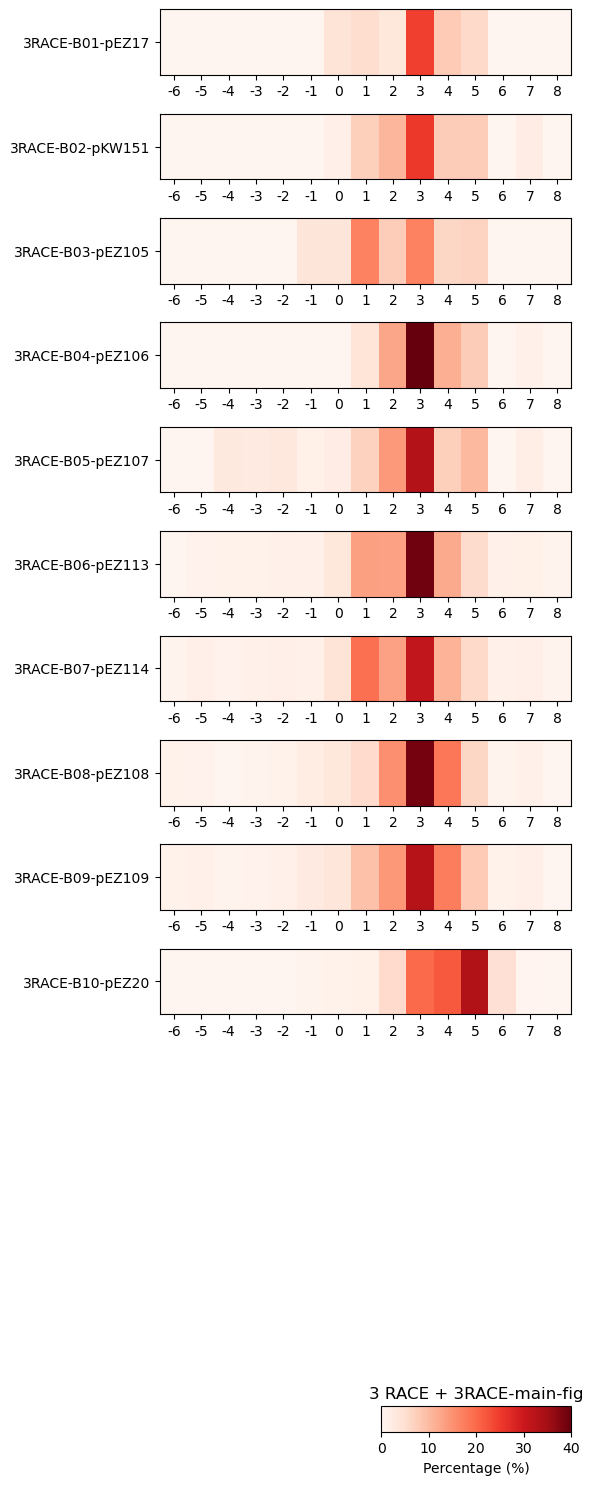

In [142]:
"""
lListOfInterest =   ['3RACE-A01-pKW151',
                     '3RACE-A02-pEZ105',
                     '3RACE-B01-pEZ17',
                     '3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105',
                     '3RACE-B04-pEZ106',
                     '3RACE-B05-pEZ107',
                     '3RACE-B06-pEZ113',
                     '3RACE-B07-pEZ114',
                     '3RACE-B08-pEZ108',
                     '3RACE-B09-pEZ109',
                     '3RACE-B10-pEZ20']
"""
# For main
sUniqueIdentifier = '3RACE-main-fig'
lListOfInterest =   ['3RACE-B01-pEZ17',
                     '3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105',
                     '3RACE-B04-pEZ106',
                     '3RACE-B05-pEZ107',
                     '3RACE-B06-pEZ113',
                     '3RACE-B07-pEZ114',
                     '3RACE-B08-pEZ108',
                     '3RACE-B09-pEZ109',
                     '3RACE-B10-pEZ20']


# min is -6, and max is 8 for 3' RACE
nMinPos = -6
nMaxPos = 8
nColorbarMax = 40

fig = plt.figure(figsize=(6,16))

gs = gridspec.GridSpec(15,4)

nOrder = 0
for sSample in lSamples:
    
    print(sSample)
    if sSample not in lListOfInterest:
        continue
    dfCount_matched = dSample2CountMatched[sSample]
    #print(dfCount_matched)

    lPercent = dfCount_matched['Percent'].tolist()
    lPercent = list(map(float, lPercent))
    l3endPos = dfCount_matched['3endPosition'].tolist()

    d3endPos2Percent = {}
    for n3endPos, fPercent in zip(l3endPos, lPercent):
        if n3endPos not in d3endPos2Percent:
            d3endPos2Percent[n3endPos] = fPercent
        else:
            d3endPos2Percent[n3endPos] = d3endPos2Percent[n3endPos] + fPercent
    
    lFilled3endPos = []
    lFilledPercent = []
    for i in range(nMinPos, nMaxPos+1, 1):
        
        lFilled3endPos.append(i)
        
        if i in list(d3endPos2Percent.keys()):
            lFilledPercent.append(d3endPos2Percent[i])
        else:
            lFilledPercent.append(0)
    #print(lFilled3endPos)
    #print(lFilledPercent)

    dfFilled3endPosPercent = pd.DataFrame(data = lFilledPercent).T
    dfFilled3endPosPercent.columns = lFilled3endPos
    #print(dfFilled3endPosPercent)

    ax_main = plt.subplot(gs[nOrder+1:nOrder+2,:])
    f = ax_main.pcolor(dfFilled3endPosPercent, cmap='Reds', vmin=0, vmax=nColorbarMax)

    ax_main.set_xticks(np.arange(len(lFilled3endPos))+0.5)
    ax_main.set_xticklabels(lFilled3endPos)
    ax_main.set_yticks(np.arange(1)+0.5)
    ax_main.set_yticklabels([sSample])
    
    #ax_main.set_ylabel('')
    
    nOrder += 1    

#make nested gridspecs for colorbar

gs_nested = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec = gs[-1:,:])
ax_color = plt.subplot(gs_nested[-1:,-1:])    
cb = Colorbar(ax=ax_color, mappable=f, orientation='horizontal')
cb.set_label('Percentage (%)')
#cb.set_ticks(np.arange(0, 150, 25))
plt.title('3 RACE + {}'.format(sUniqueIdentifier))
#plt.xlabel('3 end position of RNA')

#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '3RACE_pos_main_v2.pdf'))
plt.close


3RACE-A01-pKW151
3RACE-A02-pEZ105
3RACE-B01-pEZ17
3RACE-B02-pKW151
3RACE-B03-pEZ105
3RACE-B04-pEZ106
3RACE-B05-pEZ107
3RACE-B06-pEZ113
3RACE-B07-pEZ114
3RACE-B08-pEZ108
3RACE-B09-pEZ109
3RACE-B10-pEZ20


<function matplotlib.pyplot.close(fig=None)>

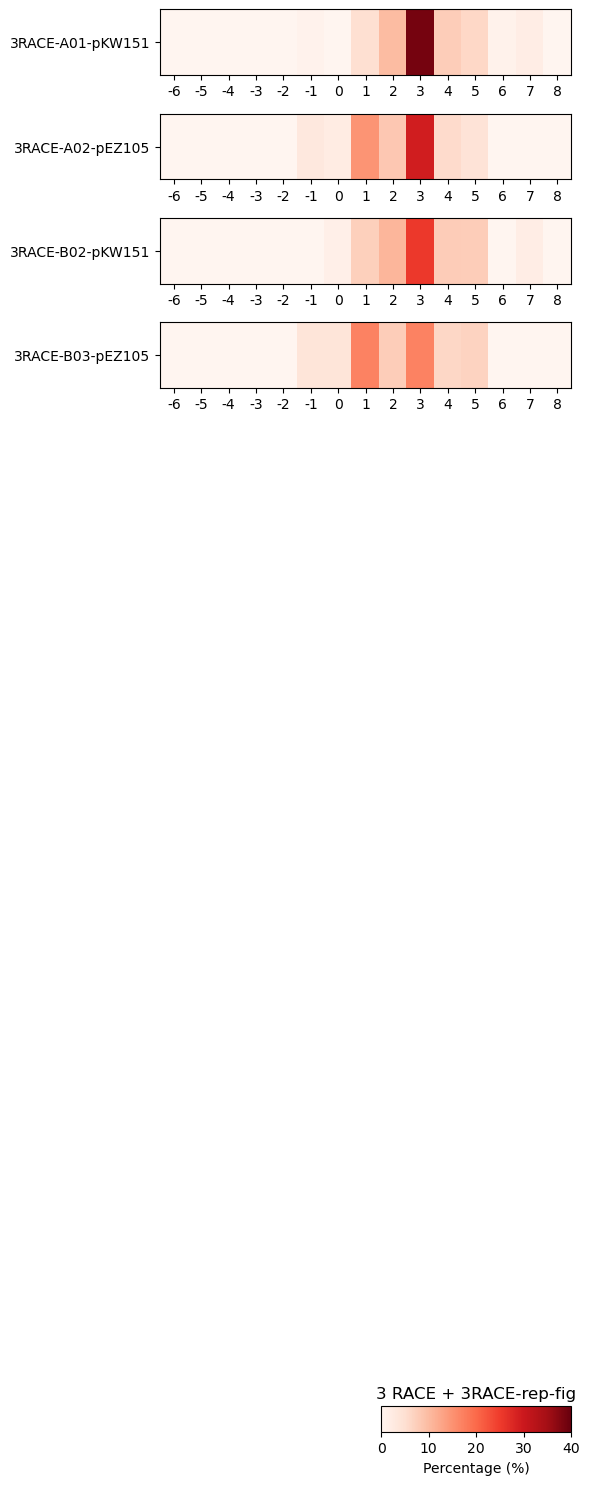

In [143]:
"""
lListOfInterest =   ['3RACE-A01-pKW151',
                     '3RACE-A02-pEZ105',
                     '3RACE-B01-pEZ17',
                     '3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105',
                     '3RACE-B04-pEZ106',
                     '3RACE-B05-pEZ107',
                     '3RACE-B06-pEZ113',
                     '3RACE-B07-pEZ114',
                     '3RACE-B08-pEZ108',
                     '3RACE-B09-pEZ109',
                     '3RACE-B10-pEZ20']
"""
# For replicate
sUniqueIdentifier = '3RACE-rep-fig'
lListOfInterest =   ['3RACE-A01-pKW151',
                     '3RACE-A02-pEZ105',                     
                     '3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105']


# min is -6, and max is 8 for 3' RACE
nMinPos = -6
nMaxPos = 8
nColorbarMax = 40

fig = plt.figure(figsize=(6,16))

gs = gridspec.GridSpec(15,4)

nOrder = 0
for sSample in lSamples:
    
    print(sSample)
    if sSample not in lListOfInterest:
        continue
    dfCount_matched = dSample2CountMatched[sSample]
    #print(dfCount_matched)

    lPercent = dfCount_matched['Percent'].tolist()
    lPercent = list(map(float, lPercent))
    l3endPos = dfCount_matched['3endPosition'].tolist()

    d3endPos2Percent = {}
    for n3endPos, fPercent in zip(l3endPos, lPercent):
        if n3endPos not in d3endPos2Percent:
            d3endPos2Percent[n3endPos] = fPercent
        else:
            d3endPos2Percent[n3endPos] = d3endPos2Percent[n3endPos] + fPercent
    
    lFilled3endPos = []
    lFilledPercent = []
    for i in range(nMinPos, nMaxPos+1, 1):
        
        lFilled3endPos.append(i)
        
        if i in list(d3endPos2Percent.keys()):
            lFilledPercent.append(d3endPos2Percent[i])
        else:
            lFilledPercent.append(0)
    #print(lFilled3endPos)
    #print(lFilledPercent)

    dfFilled3endPosPercent = pd.DataFrame(data = lFilledPercent).T
    dfFilled3endPosPercent.columns = lFilled3endPos
    #print(dfFilled3endPosPercent)

    ax_main = plt.subplot(gs[nOrder+1:nOrder+2,:])
    f = ax_main.pcolor(dfFilled3endPosPercent, cmap='Reds', vmin=0, vmax=nColorbarMax)

    ax_main.set_xticks(np.arange(len(lFilled3endPos))+0.5)
    ax_main.set_xticklabels(lFilled3endPos)
    ax_main.set_yticks(np.arange(1)+0.5)
    ax_main.set_yticklabels([sSample])
    
    #ax_main.set_ylabel('')
    
    nOrder += 1    

#make nested gridspecs for colorbar

gs_nested = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec = gs[-1:,:])
ax_color = plt.subplot(gs_nested[-1:,-1:])    
cb = Colorbar(ax=ax_color, mappable=f, orientation='horizontal')
cb.set_label('Percentage (%)')
#cb.set_ticks(np.arange(0, 150, 25))
plt.title('3 RACE + {}'.format(sUniqueIdentifier))
#plt.xlabel('3 end position of RNA')

#plt.show()
plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '3RACE_pos_sup_v2.pdf'))
plt.close


<function matplotlib.pyplot.close(fig=None)>

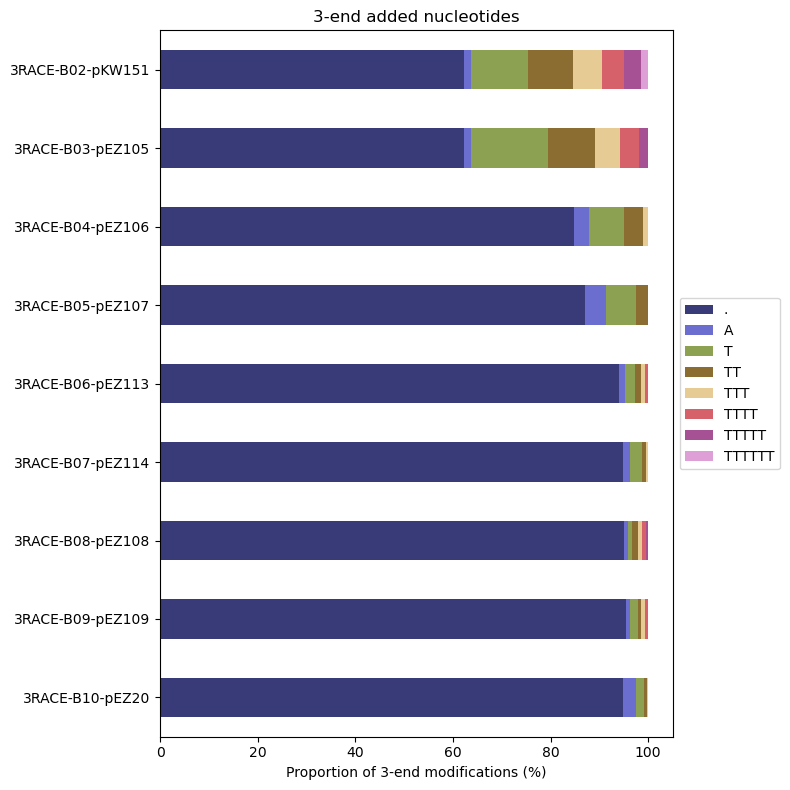

In [144]:
"""
lListOfInterest =   ['3RACE-A01-pKW151',
                     '3RACE-A02-pEZ105',
                     '3RACE-B01-pEZ17',
                     '3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105',
                     '3RACE-B04-pEZ106',
                     '3RACE-B05-pEZ107',
                     '3RACE-B06-pEZ113',
                     '3RACE-B07-pEZ114',
                     '3RACE-B08-pEZ108',
                     '3RACE-B09-pEZ109',
                     '3RACE-B10-pEZ20']
"""
# For main
sUniqueIdentifier = '3RACE-main-fig'
lListOfInterest =   ['3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105',
                     '3RACE-B04-pEZ106',
                     '3RACE-B05-pEZ107',
                     '3RACE-B06-pEZ113',
                     '3RACE-B07-pEZ114',
                     '3RACE-B08-pEZ108',
                     '3RACE-B09-pEZ109',
                     '3RACE-B10-pEZ20']

l3endTypeTables = []

for sSample in lSamples:    
    #print(sSample)
    if sSample not in lListOfInterest:
        continue
    dfCount_all = dSample2CountAll[sSample]

    d3endType2Freq = {}
    for sName3endType, dfEach in dfCount_all.groupby('3endAddedSequences'):
        fFreq3endType = dfEach['Percent'].astype(float).sum()
        d3endType2Freq[sName3endType] = fFreq3endType
    df3endTypeTable = pd.DataFrame.from_dict(d3endType2Freq, orient='index', columns=[sSample])
    l3endTypeTables.append(df3endTypeTable)

dfMerged3endTypeTable = l3endTypeTables[0]
for i in range(1, len(l3endTypeTables), 1):    
    dfMerged3endTypeTable = pd.merge(dfMerged3endTypeTable, l3endTypeTables[i], how='outer', left_index=True, right_index=True)

#print(dfMerged3endTypeTable)
#print(dfMerged3endTypeTable.sum(axis=0))

#--
dfMerged3endTypeTable.T.plot(use_index=True, kind='barh', stacked=True,
                             title="3-end added nucleotides",
                             figsize=(8,8),
                             colormap='tab20b')                        
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Proportion of 3-end modifications (%)')
#plt.show()

plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '3RACE_mod_main_v2.pdf'))
plt.close



<function matplotlib.pyplot.close(fig=None)>

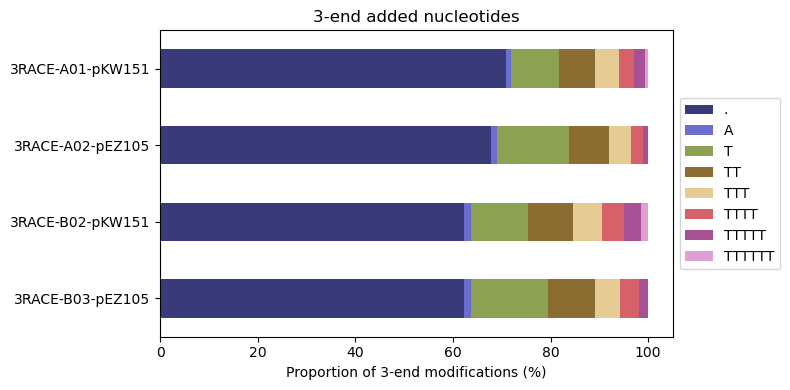

In [145]:
"""
lListOfInterest =   ['3RACE-A01-pKW151',
                     '3RACE-A02-pEZ105',
                     '3RACE-B01-pEZ17',
                     '3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105',
                     '3RACE-B04-pEZ106',
                     '3RACE-B05-pEZ107',
                     '3RACE-B06-pEZ113',
                     '3RACE-B07-pEZ114',
                     '3RACE-B08-pEZ108',
                     '3RACE-B09-pEZ109',
                     '3RACE-B10-pEZ20']
"""
# For replicate
sUniqueIdentifier = '3RACE-rep-fig'
lListOfInterest =   ['3RACE-A01-pKW151',
                     '3RACE-A02-pEZ105',                     
                     '3RACE-B02-pKW151',
                     '3RACE-B03-pEZ105']
                     

l3endTypeTables = []

for sSample in lSamples:    
    #print(sSample)
    if sSample not in lListOfInterest:
        continue
    dfCount_all = dSample2CountAll[sSample]

    d3endType2Freq = {}
    for sName3endType, dfEach in dfCount_all.groupby('3endAddedSequences'):
        fFreq3endType = dfEach['Percent'].astype(float).sum()
        d3endType2Freq[sName3endType] = fFreq3endType
    df3endTypeTable = pd.DataFrame.from_dict(d3endType2Freq, orient='index', columns=[sSample])
    l3endTypeTables.append(df3endTypeTable)

dfMerged3endTypeTable = l3endTypeTables[0]
for i in range(1, len(l3endTypeTables), 1):    
    dfMerged3endTypeTable = pd.merge(dfMerged3endTypeTable, l3endTypeTables[i], how='outer', left_index=True, right_index=True)

#print(dfMerged3endTypeTable)
#print(dfMerged3endTypeTable.sum(axis=0))
dfMerged3endTypeTable.T.plot(use_index=True, kind='barh', stacked=True,
                             title="3-end added nucleotides",
                             figsize=(8,4),
                             colormap='tab20b')                        
plt.gca().invert_yaxis()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Proportion of 3-end modifications (%)')

#plt.show()

plt.tight_layout()
plt.savefig(os.path.join(sResultFolder, '3RACE_mod_sup_v2.pdf'))
plt.close

